# Importing our modules

In [2]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [12]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


# Demo Request: Project02 Question 2.3

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3.** First, define the table `drought`. It should contain one row per year and the following two columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Precipitation"`: The sum of the total precipitation in 13 Southwest cities that year

Then, construct an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years. 

*Note*: Use the provided `bins` when creating your histogram, and do not re-assign the `southwest` table. Feel free to use as many lines as you need!

*Hint*: The optional `group` argument in a certain function might be helpful!

<!--
BEGIN QUESTION
name: q2_3
manual: true
-->

In [6]:
#From Question2.1
totals = Table.read_table('total_precipitation.csv')
totals.show(5)

Year,Precipitation
1960,149.58
1961,134.82
1962,130.41
1963,132.18
1964,123.41


In [7]:
# Given function 
def drought_label(n):
    """Return the label for an input year n."""
    if 2002 <= n <= 2005 or 2012 <= n <= 2020:
        return 'drought'
    else:
        return 'other'

Let's approach the question:

*Hint*: The optional `group` argument in a certain function might be helpful! ->See Question 2.7 of Lab07

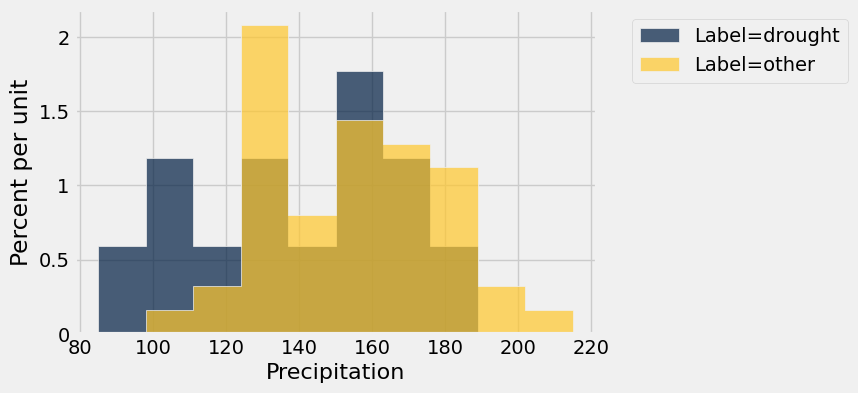

In [8]:
bins = np.arange(85, 215+1, 13)
drought = Table().with_columns('Label', totals.apply(drought_label,'Year'),
                              'Precipitation',totals.column('Precipitation'))
drought.hist('Precipitation',group='Label',bins=bins)

# Mean vs. Median

#### Calculating the mean and the median

In [4]:
sample_data = make_array(2,3,3,9)
print('sample data:',sample_data)
print('mean/average:',np.mean(sample_data))
print('median:',np.median(sample_data))

sample data: [2 3 3 9]
mean/average: 4.25
median: 3.0


#### Visualizing the concept of the mean acting as the 'Center of Gravity

Text(0.5, 1.0, 'Average as a "Center of Gravity"')

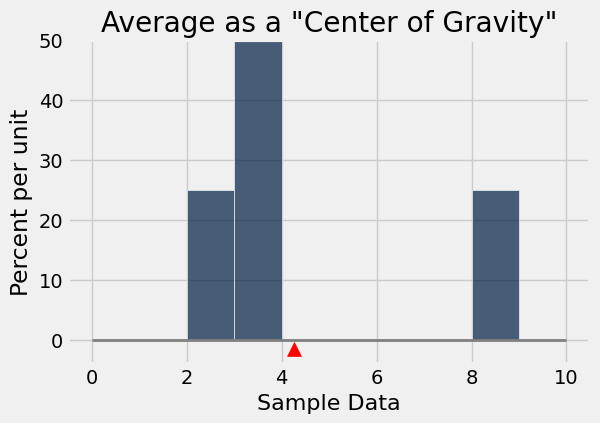

In [5]:
Table().with_column('Sample Data', sample_data).hist(bins=np.arange(0,10,1))
plt.ylim(-0.04,0.5)
plt.plot([0,10],[0,0],color='grey',lw=2)
plt.scatter(np.mean(sample_data),-0.015,marker='^',color='red',s=100)
plt.title('Average as a "Center of Gravity"')

#### A histogram of a Symmetric Distribution (more specifically, a Normal Distribution; Bell-Shaped Curve)

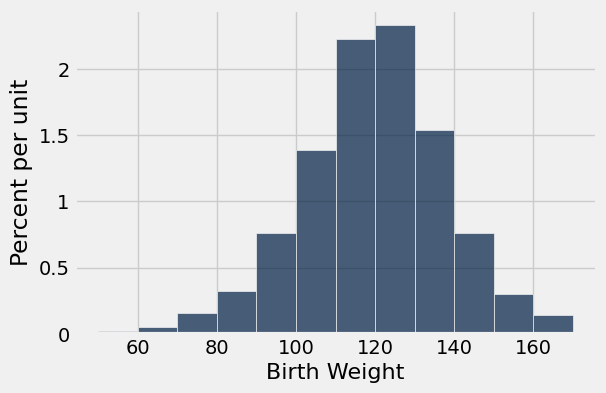

In [6]:
weight_bins = np.arange(50,180,10)
births.hist("Birth Weight",bins=weight_bins)

#### A Histogram of a Right-Skewed Distribution

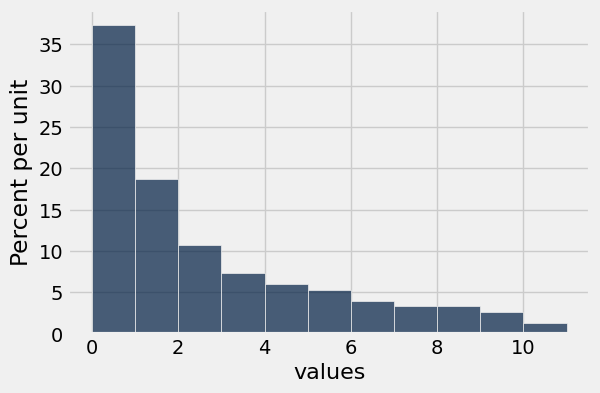

In [7]:
input_values = np.arange(0,15,0.1)
exponential_curve = 0.25*m.e**(0.25*input_values)

r_skew_bins = np.arange(0,12,1)
Table().with_columns('values',exponential_curve).hist(bins=r_skew_bins)

#### A Histogram of a Left-Skewed Distribution

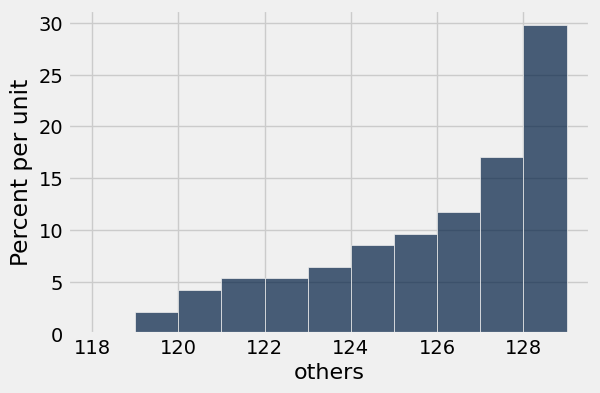

In [8]:
reverse_exponential = 130 - exponential_curve

l_skew_bins = np.arange(118,130,1)
Table().with_columns('others',reverse_exponential).hist(bins = l_skew_bins)

## Let's look at the relationship between the Mean and the Median between these different distribution types

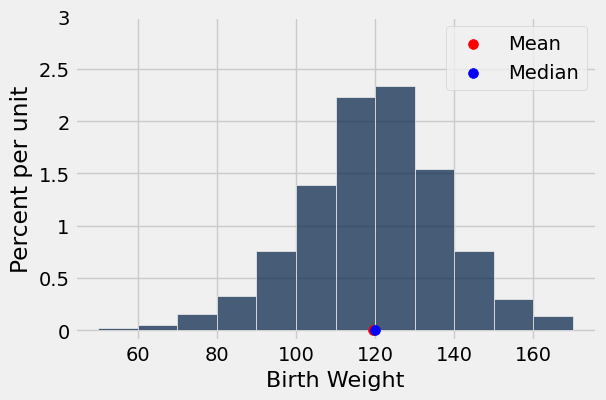

In [9]:
births.hist("Birth Weight",bins=weight_bins)
plt.scatter(np.mean(births.column('Birth Weight')), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(births.column('Birth Weight')), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.001, 0.03); 

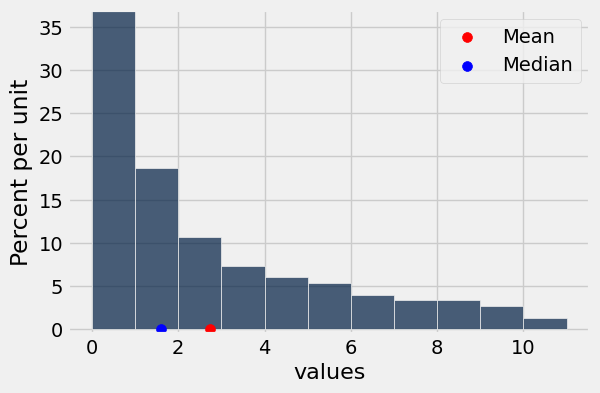

In [10]:
Table().with_columns('values',exponential_curve).hist(bins=r_skew_bins)
plt.scatter(np.mean(exponential_curve), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(exponential_curve), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.005, 0.37);

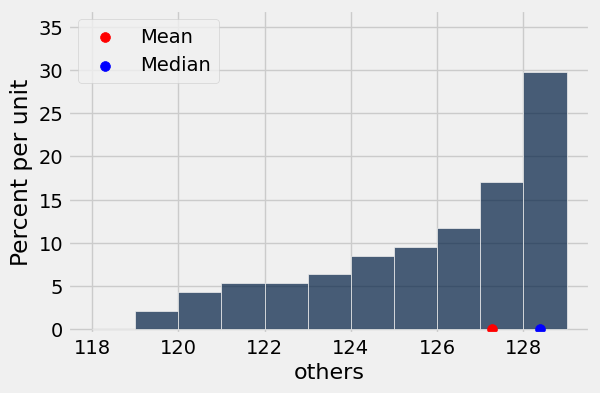

In [11]:
Table().with_columns('others',reverse_exponential).hist(bins = l_skew_bins)
plt.scatter(np.mean(reverse_exponential), 0, color='red', zorder=2, s=50, label="Mean")
plt.scatter(np.median(reverse_exponential), 0, color='blue', zorder=2, s=50, label="Median")
plt.legend()
plt.ylim(-0.005, 0.37);

# Quantifying Variability i.e. Standard Deviation

In [13]:
birth_weights = births.column('Birth Weight')
print('mean:',np.mean(birth_weights))
print('birth weights:',birth_weights)

mean: 119.462521295
birth weights: [120 113 128 ..., 130 125 117]


In [15]:
deviations = birth_weights - np.mean(birth_weights)
deviations

array([  0.53747871,  -6.46252129,   8.53747871, ...,  10.53747871,
         5.53747871,  -2.46252129])

In [16]:
square_deviations = deviations**2
square_deviations

array([   0.28888336,   41.76418148,   72.88854264, ...,  111.03845746,
         30.66367041,    6.06401113])

In [18]:
np.sum(square_deviations)/len(square_deviations)
np.mean(square_deviations)

335.65404679469134

In [19]:
m.sqrt(np.mean(square_deviations))

18.32086370220278

In [20]:
np.std(birth_weights)

18.320863702202779

In [22]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


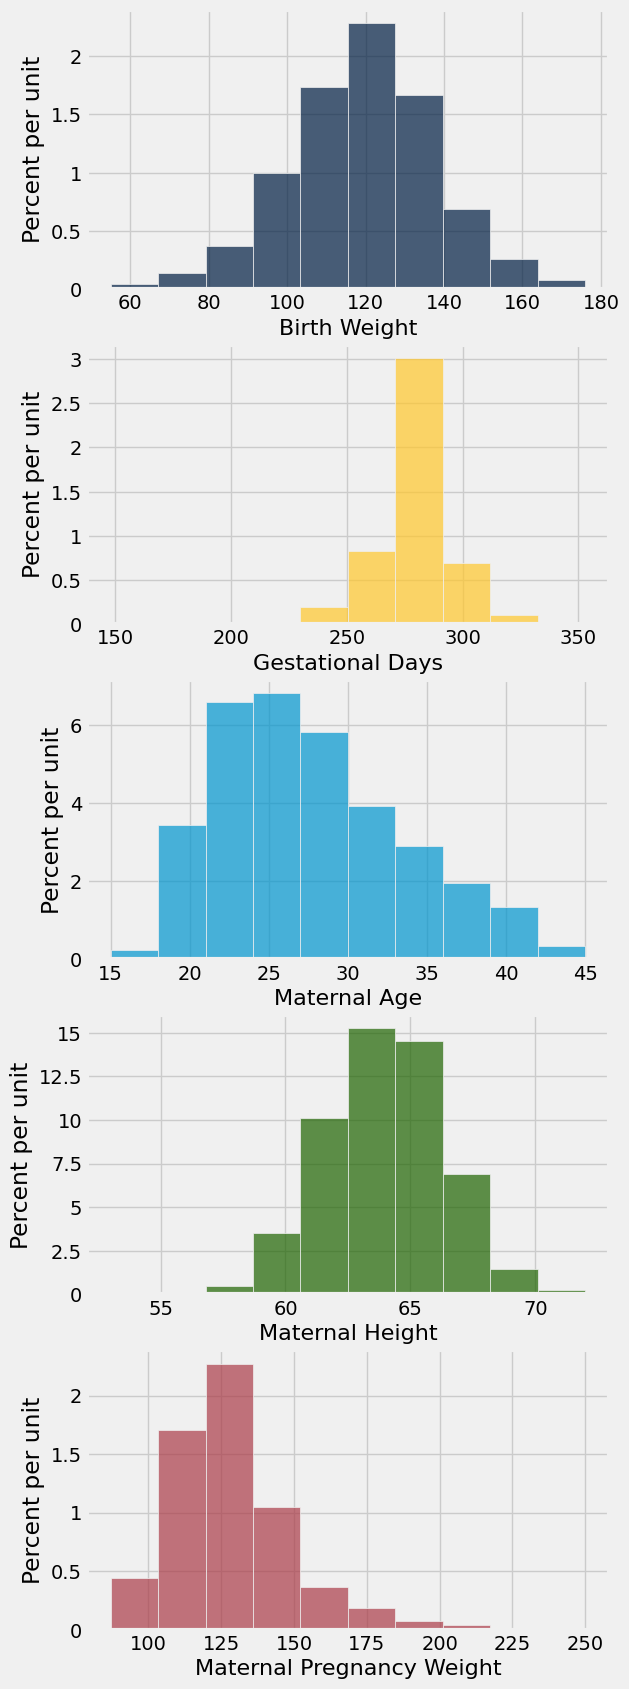

In [21]:
births.drop(5).hist(overlay=False)